In [79]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [80]:
np.random.seed(7)
data = pd.read_csv('beacon.csv',engine='python')
data.head(5)

,steps,x,y,Beacon1,Beacon2,Beacon3,Beacon4,Beacon5,Beacon6,Beacon7
0,1,5.0,6.5,-66,-67,-81,-77,-87,-85,-82
1,2,5.0,6.6,-71,-80,-73,-64,-61,-73,-82
2,3,5.0,6.7,-72,-68,-79,-78,-78,-75,-67
3,4,5.0,6.8,-84,-71,-72,-69,-65,-76,-72
4,5,5.0,6.9,-74,-87,-74,-67,-65,-70,-73


In [81]:
def l2_dist(p1, p2):
    x1,y1 = p1
    x2,y2 = p2
    x1, y1 = np.array(x1), np.array(y1)
    x2, y2 = np.array(x2), np.array(y2)
    dx = x1 - x2
    dy = y1 - y2
    dx = dx ** 2
    dy = dy ** 2
    dists = dx + dy
    dists = np.sqrt(dists)
    return np.mean(dists), dists

In [82]:
beacon_values = data.iloc[:,3:]
beacon_values

,Beacon1,Beacon2,Beacon3,Beacon4,Beacon5,Beacon6,Beacon7
0,-66,-67,-81,-77,-87,-85,-82
1,-71,-80,-73,-64,-61,-73,-82
2,-72,-68,-79,-78,-78,-75,-67
3,-84,-71,-72,-69,-65,-76,-72
4,-74,-87,-74,-67,-65,-70,-73
...,...,...,...,...,...,...,...
1911,-79,-80,-84,-83,-72,-59,-62
1912,-76,-79,-81,-90,-77,-58,-61
1913,-75,-84,-74,-88,-80,-60,-58
1914,-83,-87,-86,-84,-81,-65,-58


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

beacon_values = data.iloc[:,3:].values
print(data.shape)
from sklearn.model_selection import train_test_split
X = data.iloc[:,3:]
# print(X)
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaler = scaler.fit_transform(X)
y=data.iloc[:,1:3]
print(X_scaler)
coordinates=data.iloc[:,1:3].values 

X_train, X_test, Y_train, Y_test = train_test_split(X, coordinates, test_size=0.2, random_state=42)


(1916, 10)
[[0.65384615 0.75       0.38297872 ... 0.22       0.29545455 0.32075472]
 [0.55769231 0.45454545 0.55319149 ... 0.74       0.56818182 0.32075472]
 [0.53846154 0.72727273 0.42553191 ... 0.4        0.52272727 0.60377358]
 ...
 [0.48076923 0.36363636 0.53191489 ... 0.36       0.86363636 0.77358491]
 [0.32692308 0.29545455 0.27659574 ... 0.34       0.75       0.77358491]
 [0.53846154 0.29545455 0.4893617  ... 0.34       0.95454545 0.62264151]]


In [84]:
X_train.shape
Y_train.shape

(1532, 2)

In [85]:
X_train.shape

(1532, 7)

In [86]:
import keras 
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.layers import LSTM, Input
from keras.models import Model


#def create_deep(inp_dim):
    #seed = 7
    #np.random.seed(seed)
model = Sequential()
model.add(Dense(100, input_dim=7,activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='relu'))
    # Compile model
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='mse', optimizer=adam, metrics=['mse'])
#eturn model

es = EarlyStopping(monitor='val_loss', patience=600, verbose=2, mode='auto', restore_best_weights=True)
#model = create_deep(X_train.shape[1])
hist = model.fit(x = X_train, y = Y_train, validation_data = (X_test,Y_test), epochs=200, batch_size=12,  verbose=2, callbacks = [es])

Train on 1532 samples, validate on 384 samples
Epoch 1/200
 - 2s - loss: 16.7819 - mean_squared_error: 16.7819 - val_loss: 10.8982 - val_mean_squared_error: 10.8982
Epoch 2/200
 - 0s - loss: 9.3083 - mean_squared_error: 9.3083 - val_loss: 9.3515 - val_mean_squared_error: 9.3515
Epoch 3/200
 - 1s - loss: 9.3260 - mean_squared_error: 9.3260 - val_loss: 9.8311 - val_mean_squared_error: 9.8311
Epoch 4/200
 - 1s - loss: 9.0826 - mean_squared_error: 9.0826 - val_loss: 10.1728 - val_mean_squared_error: 10.1728
Epoch 5/200
 - 1s - loss: 8.8822 - mean_squared_error: 8.8822 - val_loss: 10.0058 - val_mean_squared_error: 10.0058
Epoch 6/200
 - 1s - loss: 9.1116 - mean_squared_error: 9.1116 - val_loss: 17.9663 - val_mean_squared_error: 17.9663
Epoch 7/200
 - 1s - loss: 8.9236 - mean_squared_error: 8.9236 - val_loss: 12.5196 - val_mean_squared_error: 12.5196
Epoch 8/200
 - 1s - loss: 8.6787 - mean_squared_error: 8.6787 - val_loss: 10.5885 - val_mean_squared_error: 10.5885
Epoch 9/200
 - 1s - loss: 8

Epoch 72/200
 - 1s - loss: 7.8719 - mean_squared_error: 7.8719 - val_loss: 9.8011 - val_mean_squared_error: 9.8011
Epoch 73/200
 - 1s - loss: 8.0363 - mean_squared_error: 8.0363 - val_loss: 8.7984 - val_mean_squared_error: 8.7984
Epoch 74/200
 - 1s - loss: 7.9893 - mean_squared_error: 7.9893 - val_loss: 8.9935 - val_mean_squared_error: 8.9935
Epoch 75/200
 - 1s - loss: 8.0028 - mean_squared_error: 8.0028 - val_loss: 8.5434 - val_mean_squared_error: 8.5434
Epoch 76/200
 - 1s - loss: 8.0345 - mean_squared_error: 8.0345 - val_loss: 9.1888 - val_mean_squared_error: 9.1888
Epoch 77/200
 - 1s - loss: 7.8360 - mean_squared_error: 7.8360 - val_loss: 9.0442 - val_mean_squared_error: 9.0442
Epoch 78/200
 - 1s - loss: 7.9542 - mean_squared_error: 7.9542 - val_loss: 9.0011 - val_mean_squared_error: 9.0011
Epoch 79/200
 - 1s - loss: 7.9517 - mean_squared_error: 7.9517 - val_loss: 9.3627 - val_mean_squared_error: 9.3627
Epoch 80/200
 - 1s - loss: 8.0256 - mean_squared_error: 8.0256 - val_loss: 9.041

Epoch 143/200
 - 1s - loss: 7.8268 - mean_squared_error: 7.8268 - val_loss: 8.5511 - val_mean_squared_error: 8.5511
Epoch 144/200
 - 1s - loss: 7.6415 - mean_squared_error: 7.6415 - val_loss: 10.7637 - val_mean_squared_error: 10.7637
Epoch 145/200
 - 1s - loss: 7.7047 - mean_squared_error: 7.7047 - val_loss: 8.6175 - val_mean_squared_error: 8.6175
Epoch 146/200
 - 1s - loss: 7.8032 - mean_squared_error: 7.8032 - val_loss: 8.9619 - val_mean_squared_error: 8.9619
Epoch 147/200
 - 1s - loss: 7.8927 - mean_squared_error: 7.8927 - val_loss: 8.8328 - val_mean_squared_error: 8.8328
Epoch 148/200
 - 1s - loss: 7.7229 - mean_squared_error: 7.7229 - val_loss: 8.5396 - val_mean_squared_error: 8.5396
Epoch 149/200
 - 1s - loss: 7.8076 - mean_squared_error: 7.8076 - val_loss: 8.7893 - val_mean_squared_error: 8.7893
Epoch 150/200
 - 1s - loss: 7.9418 - mean_squared_error: 7.9418 - val_loss: 9.7792 - val_mean_squared_error: 9.7792
Epoch 151/200
 - 1s - loss: 7.8763 - mean_squared_error: 7.8763 - val_

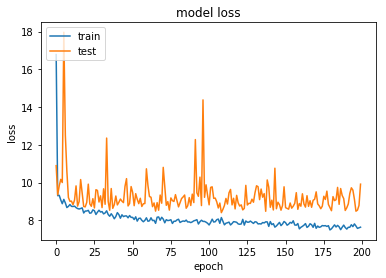

In [87]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [88]:

preds = model.predict(X_test)
l2dists_mean, l2dists = l2_dist((preds[:, 0], preds[:, 1]), (Y_test[:, 0] , Y_test[:, 0]))
print(l2dists_mean)

4.664459422478851


In [89]:
preds = model.predict(X_test)

preds.shape

(384, 2)

In [90]:
Y_test.shape

(384, 2)

In [93]:
from sklearn.model_selection import KFold 
import keras 
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.layers import LSTM, Input
from keras.models import Model

scores = []
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    model = Sequential()
    model.add(Dense(100, input_dim=7,activation='sigmoid'))
    model.add(BatchNormalization())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='relu'))
    # Compile model
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split = 0.2, verbose=2)
    ron =model.predict(X_test)
    lol = pd.DataFrame(ron)
    lol = lol.rename(columns={0:'a',1:'b'})
    actual_1=pd.DataFrame(np.array(y_test).T)
    actual = actual_1.T
    actual = actual.rename(columns={0:'x',1:'y'})
    actual['a']=lol['a']
    actual['b'] = lol['b']
    actual['distance']=np.sqrt((actual['x']-actual['a'])**2+(actual['y']-actual['b'])**2)
    mean = actual['distance'].mean()
    scores.append(mean)

C:\Users\poulr\Anaconda32\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Train Index:  [ 192  193  194 ... 1913 1914 1915] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191]
Train on 1379 samples, validate on 345 samples
Epoch 1/200
 - 2s - loss: 21.3645 - val_loss: 23.2702
Epoch 2/200
 - 0s - loss: 8.0879 - val_loss: 14.0647
E

Epoch 136/200
 - 0s - loss: 5.9539 - val_loss: 11.0388
Epoch 137/200
 - 0s - loss: 5.9647 - val_loss: 11.2024
Epoch 138/200
 - 0s - loss: 5.7754 - val_loss: 11.6837
Epoch 139/200
 - 0s - loss: 5.8456 - val_loss: 11.6735
Epoch 140/200
 - 0s - loss: 5.8104 - val_loss: 11.4264
Epoch 141/200
 - 0s - loss: 5.9368 - val_loss: 11.7198
Epoch 142/200
 - 0s - loss: 5.6775 - val_loss: 11.4886
Epoch 143/200
 - 0s - loss: 5.9705 - val_loss: 11.4156
Epoch 144/200
 - 0s - loss: 5.8095 - val_loss: 11.1857
Epoch 145/200
 - 0s - loss: 5.7354 - val_loss: 12.1490
Epoch 146/200
 - 0s - loss: 5.7872 - val_loss: 10.8067
Epoch 147/200
 - 0s - loss: 5.9082 - val_loss: 10.9504
Epoch 148/200
 - 0s - loss: 5.7184 - val_loss: 11.8662
Epoch 149/200
 - 0s - loss: 5.7665 - val_loss: 11.1745
Epoch 150/200
 - 0s - loss: 5.8142 - val_loss: 11.0390
Epoch 151/200
 - 0s - loss: 5.7384 - val_loss: 11.0915
Epoch 152/200
 - 0s - loss: 5.7303 - val_loss: 12.2434
Epoch 153/200
 - 0s - loss: 5.8360 - val_loss: 11.2803
Epoch 154/

 - 0s - loss: 7.2883 - val_loss: 11.8207
Epoch 71/200
 - 0s - loss: 7.3672 - val_loss: 12.4181
Epoch 72/200
 - 0s - loss: 7.3457 - val_loss: 11.9436
Epoch 73/200
 - 0s - loss: 7.2491 - val_loss: 12.3016
Epoch 74/200
 - 0s - loss: 7.2761 - val_loss: 11.6447
Epoch 75/200
 - 0s - loss: 7.3322 - val_loss: 11.8884
Epoch 76/200
 - 0s - loss: 7.2129 - val_loss: 11.8171
Epoch 77/200
 - 0s - loss: 7.2526 - val_loss: 12.7383
Epoch 78/200
 - 0s - loss: 7.2156 - val_loss: 13.1361
Epoch 79/200
 - 0s - loss: 7.1758 - val_loss: 12.8382
Epoch 80/200
 - 0s - loss: 7.0784 - val_loss: 11.8492
Epoch 81/200
 - 0s - loss: 7.0689 - val_loss: 12.5580
Epoch 82/200
 - 0s - loss: 7.1653 - val_loss: 11.9832
Epoch 83/200
 - 0s - loss: 7.0256 - val_loss: 12.5068
Epoch 84/200
 - 0s - loss: 7.0837 - val_loss: 11.9287
Epoch 85/200
 - 0s - loss: 7.1828 - val_loss: 11.8411
Epoch 86/200
 - 0s - loss: 7.1661 - val_loss: 11.2156
Epoch 87/200
 - 0s - loss: 6.9509 - val_loss: 12.0885
Epoch 88/200
 - 0s - loss: 7.0263 - val_l

Epoch 4/200
 - 0s - loss: 8.3437 - val_loss: 13.1634
Epoch 5/200
 - 0s - loss: 8.3408 - val_loss: 12.2525
Epoch 6/200
 - 0s - loss: 8.1998 - val_loss: 12.1935
Epoch 7/200
 - 0s - loss: 8.3151 - val_loss: 12.4798
Epoch 8/200
 - 0s - loss: 8.1905 - val_loss: 12.1406
Epoch 9/200
 - 0s - loss: 8.0939 - val_loss: 11.8974
Epoch 10/200
 - 0s - loss: 7.9138 - val_loss: 11.8512
Epoch 11/200
 - 0s - loss: 7.9565 - val_loss: 12.0527
Epoch 12/200
 - 0s - loss: 8.1781 - val_loss: 11.8218
Epoch 13/200
 - 0s - loss: 7.9856 - val_loss: 12.7535
Epoch 14/200
 - 0s - loss: 7.8717 - val_loss: 11.5425
Epoch 15/200
 - 0s - loss: 7.8465 - val_loss: 11.8831
Epoch 16/200
 - 0s - loss: 7.7753 - val_loss: 11.6538
Epoch 17/200
 - 0s - loss: 7.7859 - val_loss: 11.9517
Epoch 18/200
 - 0s - loss: 7.7728 - val_loss: 12.8683
Epoch 19/200
 - 0s - loss: 7.8593 - val_loss: 11.2449
Epoch 20/200
 - 0s - loss: 7.8975 - val_loss: 12.8979
Epoch 21/200
 - 0s - loss: 7.5978 - val_loss: 11.5891
Epoch 22/200
 - 0s - loss: 7.9529 

Epoch 155/200
 - 0s - loss: 6.4115 - val_loss: 12.2979
Epoch 156/200
 - 0s - loss: 6.4958 - val_loss: 12.2616
Epoch 157/200
 - 0s - loss: 6.7549 - val_loss: 12.0149
Epoch 158/200
 - 0s - loss: 6.7252 - val_loss: 12.6728
Epoch 159/200
 - 0s - loss: 6.7046 - val_loss: 11.9130
Epoch 160/200
 - 0s - loss: 6.4983 - val_loss: 11.8104
Epoch 161/200
 - 0s - loss: 6.4849 - val_loss: 12.0688
Epoch 162/200
 - 0s - loss: 6.5044 - val_loss: 11.9113
Epoch 163/200
 - 0s - loss: 6.4951 - val_loss: 11.8994
Epoch 164/200
 - 0s - loss: 6.9558 - val_loss: 21.4468
Epoch 165/200
 - 0s - loss: 6.7697 - val_loss: 11.6854
Epoch 166/200
 - 0s - loss: 6.6768 - val_loss: 11.8808
Epoch 167/200
 - 0s - loss: 6.5491 - val_loss: 11.7218
Epoch 168/200
 - 0s - loss: 6.5014 - val_loss: 11.7970
Epoch 169/200
 - 0s - loss: 6.4987 - val_loss: 12.3244
Epoch 170/200
 - 0s - loss: 6.5222 - val_loss: 11.2930
Epoch 171/200
 - 0s - loss: 6.5982 - val_loss: 12.0786
Epoch 172/200
 - 0s - loss: 6.6104 - val_loss: 12.0690
Epoch 173/

Epoch 90/200
 - 0s - loss: 6.0837 - val_loss: 12.4968
Epoch 91/200
 - 0s - loss: 6.2367 - val_loss: 12.8599
Epoch 92/200
 - 0s - loss: 6.0497 - val_loss: 12.8530
Epoch 93/200
 - 0s - loss: 6.0184 - val_loss: 12.0007
Epoch 94/200
 - 0s - loss: 6.0278 - val_loss: 12.4129
Epoch 95/200
 - 0s - loss: 6.0083 - val_loss: 12.4369
Epoch 96/200
 - 0s - loss: 6.1294 - val_loss: 12.5943
Epoch 97/200
 - 0s - loss: 6.0238 - val_loss: 14.0958
Epoch 98/200
 - 0s - loss: 6.1227 - val_loss: 13.8043
Epoch 99/200
 - 0s - loss: 6.1340 - val_loss: 14.6664
Epoch 100/200
 - 0s - loss: 5.9662 - val_loss: 13.1609
Epoch 101/200
 - 0s - loss: 6.0170 - val_loss: 12.0578
Epoch 102/200
 - 0s - loss: 5.9630 - val_loss: 12.3733
Epoch 103/200
 - 0s - loss: 6.0017 - val_loss: 13.3104
Epoch 104/200
 - 0s - loss: 5.9754 - val_loss: 12.8469
Epoch 105/200
 - 0s - loss: 5.9077 - val_loss: 12.6155
Epoch 106/200
 - 0s - loss: 5.8725 - val_loss: 14.0466
Epoch 107/200
 - 0s - loss: 6.1540 - val_loss: 11.8174
Epoch 108/200
 - 0s 

Epoch 24/200
 - 0s - loss: 7.2311 - val_loss: 13.0447
Epoch 25/200
 - 0s - loss: 7.2412 - val_loss: 12.5789
Epoch 26/200
 - 0s - loss: 7.2765 - val_loss: 14.2422
Epoch 27/200
 - 0s - loss: 7.1871 - val_loss: 11.7910
Epoch 28/200
 - 0s - loss: 7.3171 - val_loss: 12.4327
Epoch 29/200
 - 0s - loss: 6.9691 - val_loss: 12.0566
Epoch 30/200
 - 0s - loss: 7.1382 - val_loss: 12.0860
Epoch 31/200
 - 0s - loss: 7.2142 - val_loss: 11.8901
Epoch 32/200
 - 0s - loss: 7.1202 - val_loss: 13.0797
Epoch 33/200
 - 0s - loss: 7.1824 - val_loss: 12.1004
Epoch 34/200
 - 0s - loss: 7.1437 - val_loss: 12.6310
Epoch 35/200
 - 0s - loss: 7.0742 - val_loss: 12.9632
Epoch 36/200
 - 0s - loss: 6.9643 - val_loss: 12.1635
Epoch 37/200
 - 0s - loss: 7.0987 - val_loss: 12.5595
Epoch 38/200
 - 0s - loss: 7.1600 - val_loss: 12.3929
Epoch 39/200
 - 0s - loss: 7.1150 - val_loss: 12.4839
Epoch 40/200
 - 0s - loss: 7.0026 - val_loss: 11.9757
Epoch 41/200
 - 0s - loss: 6.9461 - val_loss: 13.2549
Epoch 42/200
 - 0s - loss: 6

Epoch 175/200
 - 0s - loss: 6.0989 - val_loss: 12.2575
Epoch 176/200
 - 0s - loss: 5.8951 - val_loss: 12.7480
Epoch 177/200
 - 0s - loss: 6.0041 - val_loss: 11.6384
Epoch 178/200
 - 0s - loss: 5.9420 - val_loss: 11.9098
Epoch 179/200
 - 0s - loss: 5.8495 - val_loss: 11.7617
Epoch 180/200
 - 0s - loss: 5.9798 - val_loss: 12.3031
Epoch 181/200
 - 0s - loss: 5.9568 - val_loss: 12.2657
Epoch 182/200
 - 0s - loss: 5.9485 - val_loss: 12.4573
Epoch 183/200
 - 0s - loss: 5.8110 - val_loss: 11.4038
Epoch 184/200
 - 0s - loss: 6.2296 - val_loss: 11.8820
Epoch 185/200
 - 0s - loss: 5.9680 - val_loss: 12.4554
Epoch 186/200
 - 0s - loss: 6.0679 - val_loss: 12.1704
Epoch 187/200
 - 0s - loss: 5.9110 - val_loss: 12.6117
Epoch 188/200
 - 0s - loss: 5.9928 - val_loss: 12.5341
Epoch 189/200
 - 0s - loss: 5.8705 - val_loss: 13.1649
Epoch 190/200
 - 0s - loss: 5.7770 - val_loss: 13.6482
Epoch 191/200
 - 0s - loss: 5.9679 - val_loss: 12.9183
Epoch 192/200
 - 0s - loss: 5.8565 - val_loss: 13.2197
Epoch 193/

 - 0s - loss: 6.8631 - val_loss: 11.9542
Epoch 107/200
 - 0s - loss: 6.8620 - val_loss: 12.9956
Epoch 108/200
 - 0s - loss: 6.7963 - val_loss: 11.5244
Epoch 109/200
 - 0s - loss: 6.8201 - val_loss: 13.0222
Epoch 110/200
 - 0s - loss: 6.7372 - val_loss: 12.1517
Epoch 111/200
 - 0s - loss: 6.9198 - val_loss: 12.2553
Epoch 112/200
 - 0s - loss: 6.7578 - val_loss: 12.6641
Epoch 113/200
 - 0s - loss: 6.9339 - val_loss: 13.3418
Epoch 114/200
 - 0s - loss: 6.8161 - val_loss: 12.5118
Epoch 115/200
 - 0s - loss: 6.6341 - val_loss: 12.2965
Epoch 116/200
 - 0s - loss: 6.7710 - val_loss: 11.7295
Epoch 117/200
 - 0s - loss: 6.7520 - val_loss: 12.6662
Epoch 118/200
 - 0s - loss: 6.8836 - val_loss: 13.1082
Epoch 119/200
 - 0s - loss: 6.7558 - val_loss: 12.4041
Epoch 120/200
 - 0s - loss: 6.5521 - val_loss: 12.4315
Epoch 121/200
 - 0s - loss: 6.8345 - val_loss: 11.5666
Epoch 122/200
 - 0s - loss: 6.7233 - val_loss: 13.3377
Epoch 123/200
 - 0s - loss: 6.5977 - val_loss: 12.6756
Epoch 124/200
 - 0s - lo

Epoch 37/200
 - 0s - loss: 7.3427 - val_loss: 13.1647
Epoch 38/200
 - 0s - loss: 7.2261 - val_loss: 12.9280
Epoch 39/200
 - 0s - loss: 7.2467 - val_loss: 13.1200
Epoch 40/200
 - 0s - loss: 7.2959 - val_loss: 13.2809
Epoch 41/200
 - 0s - loss: 7.2773 - val_loss: 12.6758
Epoch 42/200
 - 0s - loss: 7.1174 - val_loss: 13.1001
Epoch 43/200
 - 0s - loss: 7.3799 - val_loss: 13.5024
Epoch 44/200
 - 0s - loss: 7.2312 - val_loss: 12.7899
Epoch 45/200
 - 0s - loss: 7.1355 - val_loss: 12.3319
Epoch 46/200
 - 0s - loss: 7.1524 - val_loss: 12.7600
Epoch 47/200
 - 0s - loss: 7.1900 - val_loss: 13.5707
Epoch 48/200
 - 0s - loss: 7.2036 - val_loss: 12.3882
Epoch 49/200
 - 0s - loss: 7.2514 - val_loss: 13.2190
Epoch 50/200
 - 0s - loss: 7.2301 - val_loss: 12.3264
Epoch 51/200
 - 0s - loss: 7.2065 - val_loss: 13.5145
Epoch 52/200
 - 0s - loss: 7.1561 - val_loss: 12.8256
Epoch 53/200
 - 0s - loss: 7.2228 - val_loss: 12.6727
Epoch 54/200
 - 0s - loss: 7.0162 - val_loss: 13.4060
Epoch 55/200
 - 0s - loss: 7

 - 0s - loss: 6.0518 - val_loss: 13.4505
Epoch 188/200
 - 0s - loss: 6.0162 - val_loss: 13.4757
Epoch 189/200
 - 0s - loss: 5.9996 - val_loss: 13.1747
Epoch 190/200
 - 0s - loss: 5.7842 - val_loss: 13.7220
Epoch 191/200
 - 0s - loss: 5.8237 - val_loss: 13.4115
Epoch 192/200
 - 0s - loss: 6.0461 - val_loss: 12.8323
Epoch 193/200
 - 0s - loss: 6.3207 - val_loss: 12.8130
Epoch 194/200
 - 0s - loss: 5.8272 - val_loss: 13.3087
Epoch 195/200
 - 0s - loss: 5.8903 - val_loss: 13.4793
Epoch 196/200
 - 0s - loss: 5.7323 - val_loss: 13.0458
Epoch 197/200
 - 0s - loss: 5.8431 - val_loss: 13.7121
Epoch 198/200
 - 0s - loss: 5.7617 - val_loss: 12.7053
Epoch 199/200
 - 0s - loss: 5.8087 - val_loss: 13.5266
Epoch 200/200
 - 0s - loss: 5.9911 - val_loss: 13.5266
Train Index:  [   0    1    2 ... 1913 1914 1915] 

Test Index:  [1343 1344 1345 1346 1347 1348 1349 1350 1351 1352 1353 1354 1355 1356
 1357 1358 1359 1360 1361 1362 1363 1364 1365 1366 1367 1368 1369 1370
 1371 1372 1373 1374 1375 1376 1377 1

Epoch 119/200
 - 0s - loss: 6.7990 - val_loss: 13.6959
Epoch 120/200
 - 0s - loss: 6.9014 - val_loss: 12.6432
Epoch 121/200
 - 0s - loss: 6.8876 - val_loss: 12.8063
Epoch 122/200
 - 0s - loss: 6.7960 - val_loss: 12.5268
Epoch 123/200
 - 0s - loss: 6.7214 - val_loss: 11.9004
Epoch 124/200
 - 0s - loss: 6.9254 - val_loss: 12.8531
Epoch 125/200
 - 0s - loss: 6.7869 - val_loss: 12.8330
Epoch 126/200
 - 0s - loss: 6.6693 - val_loss: 12.7014
Epoch 127/200
 - 0s - loss: 6.8754 - val_loss: 12.5478
Epoch 128/200
 - 0s - loss: 6.8939 - val_loss: 12.8581
Epoch 129/200
 - 0s - loss: 6.6950 - val_loss: 12.6186
Epoch 130/200
 - 0s - loss: 6.7052 - val_loss: 12.8729
Epoch 131/200
 - 0s - loss: 6.7417 - val_loss: 13.5034
Epoch 132/200
 - 0s - loss: 6.6853 - val_loss: 13.8470
Epoch 133/200
 - 0s - loss: 6.7786 - val_loss: 13.1902
Epoch 134/200
 - 0s - loss: 6.7427 - val_loss: 13.0406
Epoch 135/200
 - 0s - loss: 6.8694 - val_loss: 12.3797
Epoch 136/200
 - 0s - loss: 6.6294 - val_loss: 11.9957
Epoch 137/

 - 0s - loss: 7.6195 - val_loss: 8.0331
Epoch 51/200
 - 0s - loss: 7.4637 - val_loss: 8.4185
Epoch 52/200
 - 0s - loss: 7.5112 - val_loss: 8.4490
Epoch 53/200
 - 0s - loss: 7.4456 - val_loss: 9.4895
Epoch 54/200
 - 0s - loss: 7.6041 - val_loss: 7.8985
Epoch 55/200
 - 0s - loss: 7.6044 - val_loss: 8.1206
Epoch 56/200
 - 0s - loss: 7.6683 - val_loss: 6.4091
Epoch 57/200
 - 0s - loss: 7.3739 - val_loss: 8.8015
Epoch 58/200
 - 0s - loss: 7.3810 - val_loss: 9.1128
Epoch 59/200
 - 0s - loss: 7.5384 - val_loss: 8.0082
Epoch 60/200
 - 0s - loss: 7.7043 - val_loss: 8.6427
Epoch 61/200
 - 0s - loss: 7.3183 - val_loss: 10.8027
Epoch 62/200
 - 0s - loss: 7.4526 - val_loss: 6.8266
Epoch 63/200
 - 0s - loss: 7.2911 - val_loss: 8.7600
Epoch 64/200
 - 0s - loss: 7.3617 - val_loss: 7.5056
Epoch 65/200
 - 0s - loss: 7.4316 - val_loss: 9.6108
Epoch 66/200
 - 0s - loss: 7.3650 - val_loss: 6.5471
Epoch 67/200
 - 0s - loss: 7.3677 - val_loss: 7.8122
Epoch 68/200
 - 0s - loss: 7.4942 - val_loss: 10.8394
Epoc

Train on 1380 samples, validate on 345 samples
Epoch 1/200
 - 2s - loss: 24.5076 - val_loss: 13.8023
Epoch 2/200
 - 0s - loss: 9.5653 - val_loss: 10.5387
Epoch 3/200
 - 0s - loss: 8.5385 - val_loss: 9.8332
Epoch 4/200
 - 0s - loss: 8.2928 - val_loss: 10.4113
Epoch 5/200
 - 0s - loss: 8.3562 - val_loss: 10.1665
Epoch 6/200
 - 0s - loss: 8.3900 - val_loss: 9.9148
Epoch 7/200
 - 0s - loss: 8.2902 - val_loss: 9.5354
Epoch 8/200
 - 0s - loss: 8.2431 - val_loss: 9.5408
Epoch 9/200
 - 0s - loss: 8.1669 - val_loss: 10.1232
Epoch 10/200
 - 0s - loss: 8.2161 - val_loss: 10.5880
Epoch 11/200
 - 0s - loss: 8.1036 - val_loss: 9.5178
Epoch 12/200
 - 0s - loss: 8.0332 - val_loss: 9.6987
Epoch 13/200
 - 0s - loss: 7.9812 - val_loss: 10.6616
Epoch 14/200
 - 0s - loss: 8.1028 - val_loss: 10.7151
Epoch 15/200
 - 0s - loss: 8.0070 - val_loss: 9.5851
Epoch 16/200
 - 0s - loss: 8.0069 - val_loss: 9.5183
Epoch 17/200
 - 0s - loss: 7.8806 - val_loss: 9.5757
Epoch 18/200
 - 0s - loss: 8.0484 - val_loss: 10.233

Epoch 153/200
 - 0s - loss: 6.3534 - val_loss: 10.8265
Epoch 154/200
 - 0s - loss: 6.4543 - val_loss: 9.2103
Epoch 155/200
 - 0s - loss: 6.4973 - val_loss: 9.1838
Epoch 156/200
 - 0s - loss: 6.5516 - val_loss: 10.4490
Epoch 157/200
 - 0s - loss: 6.3837 - val_loss: 10.1199
Epoch 158/200
 - 0s - loss: 6.5758 - val_loss: 9.4092
Epoch 159/200
 - 0s - loss: 6.4199 - val_loss: 10.7168
Epoch 160/200
 - 0s - loss: 6.2527 - val_loss: 9.4498
Epoch 161/200
 - 0s - loss: 6.5127 - val_loss: 9.3546
Epoch 162/200
 - 0s - loss: 6.2760 - val_loss: 9.7350
Epoch 163/200
 - 0s - loss: 6.3186 - val_loss: 10.1510
Epoch 164/200
 - 0s - loss: 6.4047 - val_loss: 9.5992
Epoch 165/200
 - 0s - loss: 6.3414 - val_loss: 9.5199
Epoch 166/200
 - 0s - loss: 6.3383 - val_loss: 9.5957
Epoch 167/200
 - 0s - loss: 6.1878 - val_loss: 9.8225
Epoch 168/200
 - 0s - loss: 6.1907 - val_loss: 9.3472
Epoch 169/200
 - 0s - loss: 6.2052 - val_loss: 11.2252
Epoch 170/200
 - 0s - loss: 6.1537 - val_loss: 9.4704
Epoch 171/200
 - 0s - 

In [94]:
mean


4.056883057895618

In [95]:
scores

[4.82137858325047,
 2.9699783228288084,
 3.4046754706321707,
 5.346286430601702,
 4.024002739993342,
 3.5006812787530968,
 4.203743896732098,
 2.8731456360155314,
 4.579504725058584,
 4.056883057895618]

Text(0.5,0,'MLP')

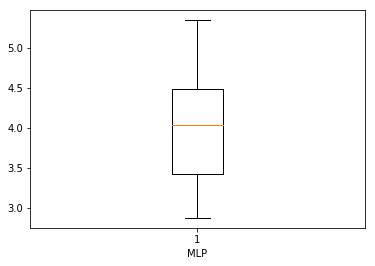

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(scores)
plt.xlabel('MLP')